In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
print(nx.__version__)
%matplotlib inline

2.3


In [33]:
street_names = set(pd.read_csv('street-names.csv')['StreetName'])
street_names

{'CARSON',
 'GORHAM',
 'INFANTRY',
 'MARLIN',
 'DELANO',
 'ROACH',
 'ARKANSAS',
 'ORSI',
 'SAN JUAN',
 '10TH TI',
 'POWERS',
 'GERMANIA',
 'HAWTHORNE',
 'WALLACE',
 'HALYBURTON',
 'LANDERS',
 'FITCH',
 'DELTA',
 'BOWDOIN',
 'CHURCH ACCESS',
 'BLANCHE',
 'FORT MASON 16',
 'GREELY',
 'COLERIDGE',
 'MARGRAVE',
 'MOSS',
 'NORTH HUGHES',
 'RIPLEY',
 'EDINBURGH',
 'LEE',
 'PINE',
 'ALVORD',
 'PATTEN',
 'SHEPHARD',
 'STANFORD',
 'SFGH ACCESS',
 'BATTERY WAGNER',
 'ACEVEDO',
 'BELLES',
 'JUDSON',
 'GENEVA',
 'MINNA',
 'CHATTANOOGA',
 'EMMA',
 'LAPIDGE',
 'CARPENTER',
 'OLYMPIA',
 'LONE MOUNTAIN',
 'DAY',
 'PRECITA',
 'STERLING',
 'ZIRCON',
 'LOCKWOOD',
 'FLINT',
 'ROANOKE',
 'CRAIG',
 'HOOKER',
 'LUSK',
 'WASHINGTON',
 'LUCKY',
 'KENWOOD',
 'ROSIE LEE',
 'BROOKS',
 'VENUS',
 'MARNE',
 'J',
 'FILLMORE',
 'HARRIS',
 '03RD TI',
 'GOLDBERG',
 'DAWNVIEW',
 'SEVERN',
 'CLAUDE',
 'DUNSHEE',
 'BERRY EXTENSION',
 'MONTE VISTA',
 'NORTHRIDGE',
 'CARGO',
 'MANCHESTER',
 'DEMING',
 'HYDE',
 'STILLMAN',
 '

In [34]:
from random import randint, choice, sample
from itertools import count
from dsu import DSU

def gen_graph(n_stations: list):
    G = nx.Graph()
    names = sample(street_names, sum(n_stations))
    assert len(names) == len(set(names))
    lines_names = list([i.title() for i in names])
    node_names = [lines_names[sum(n_stations[:c]):sum(n_stations[:c]) + stations] for c, stations in zip(count(), n_stations)]
    lines = []
    for c, stations in zip(count(), n_stations):
        G.add_nodes_from(node_names[c], color = c / (len(n_stations) - 1))
        for f, t in zip(node_names[c][:-1], node_names[c][1:]):
            G.add_edge(f, t, length = randint(5, 8), weight = 4, color = c / (len(n_stations) - 1))
    c = 0
    d = DSU(len(n_stations))
    while c != len(n_stations)-1:
        i, j = randint(0, len(n_stations) - 1), randint(0, len(n_stations) - 1)
        if d.get(i) != d.get(j):
            f, t = choice(node_names[i]), choice(node_names[j])
            G.add_edge(f, t, length = randint(2, 5), weight = 2, color = -1)
            d.join(i, j)
            c+=1

    return G


In [53]:
import io
def get_svg(g):
    G = gen_graph(g)
    print(G.edges())
    cmap = plt.cm.get_cmap('gist_rainbow')
    node_colors = [cmap(i[1]['color']) if i[1]['color'] != -1 else (0.2, 0.2, 0.2, 1.0) for i in G.nodes(data=True)]
    edge_colors = [cmap(i[2]['color']) if i[2]['color'] != -1 else (0.2, 0.2, 0.2, 1.0) for i in G.edges(data=True)]
    edge_labels = {(i[0], i[1]): i[2]['length'] for i in G.edges(data=True)}

    plt.figure(figsize=(50, 50)) 
    # pos = nx.kamada_kawai_layout(G)
    # print(pos)
    pos = nx.kamada_kawai_layout(G, weight='weight')
    print(pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, pos, 
                  with_labels=True, 
                  node_size=300,
                  node_color=node_colors,
                  edge_color=edge_colors,
                  width=10.0)
    t = io.StringIO()
    plt.savefig(t, format='svg')
    t.seek(0)
    return t.read()

[('Severn', 'Imperial'), ('Imperial', 'Lulu'), ('Lulu', 'Gerke'), ('Lulu', 'Shafter'), ('Oak Access', 'Peabody'), ('Oak Access', 'Diamond Heights'), ('Peabody', 'Shafter'), ('Shafter', 'Pollard'), ('Moraga', 'Thorp'), ('Thorp', 'Diamond Heights'), ('Diamond Heights', 'Saint Francis')]
{'Severn': array([0.61479989, 0.79473963]), 'Imperial': array([0.35778983, 0.60022751]), 'Lulu': array([0.04607612, 0.4560252 ]), 'Gerke': array([-0.10984001,  0.76905453]), 'Oak Access': array([-0.01651446, -0.35198432]), 'Peabody': array([-0.01833492, -0.0219759 ]), 'Shafter': array([-0.04701367,  0.31913403]), 'Pollard': array([-0.3965303 ,  0.39571584]), 'Moraga': array([-0.4490517, -1.       ]), 'Thorp': array([-0.25571005, -0.74763776]), 'Diamond Heights': array([-0.00883841, -0.51310714]), 'Saint Francis': array([ 0.28316767, -0.70019162])}


'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Created with matplotlib (https://matplotlib.org/) -->\n<svg height="3600pt" version="1.1" viewBox="0 0 3600 3600" width="3600pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n <defs>\n  <style type="text/css">\n*{stroke-linecap:butt;stroke-linejoin:round;}\n  </style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 3600 \nL 3600 3600 \nL 3600 0 \nL 0 0 \nz\n" style="fill:#ffffff;"/>\n  </g>\n  <g id="axes_1">\n   <g id="LineCollection_1">\n    <path clip-path="url(#p773815d670)" d="M 3105.824323 559.916619 \nL 2496.633094 826.763841 \n" style="fill:none;stroke:#ff0029;stroke-width:10;"/>\n    <path clip-path="url(#p773815d670)" d="M 2496.633094 826.763841 \nL 1757.777729 1024.592055 \n" style="fill:none;stroke:#ff0029;stroke-width:10;"/>\n    <path clip-path="url(#p773815

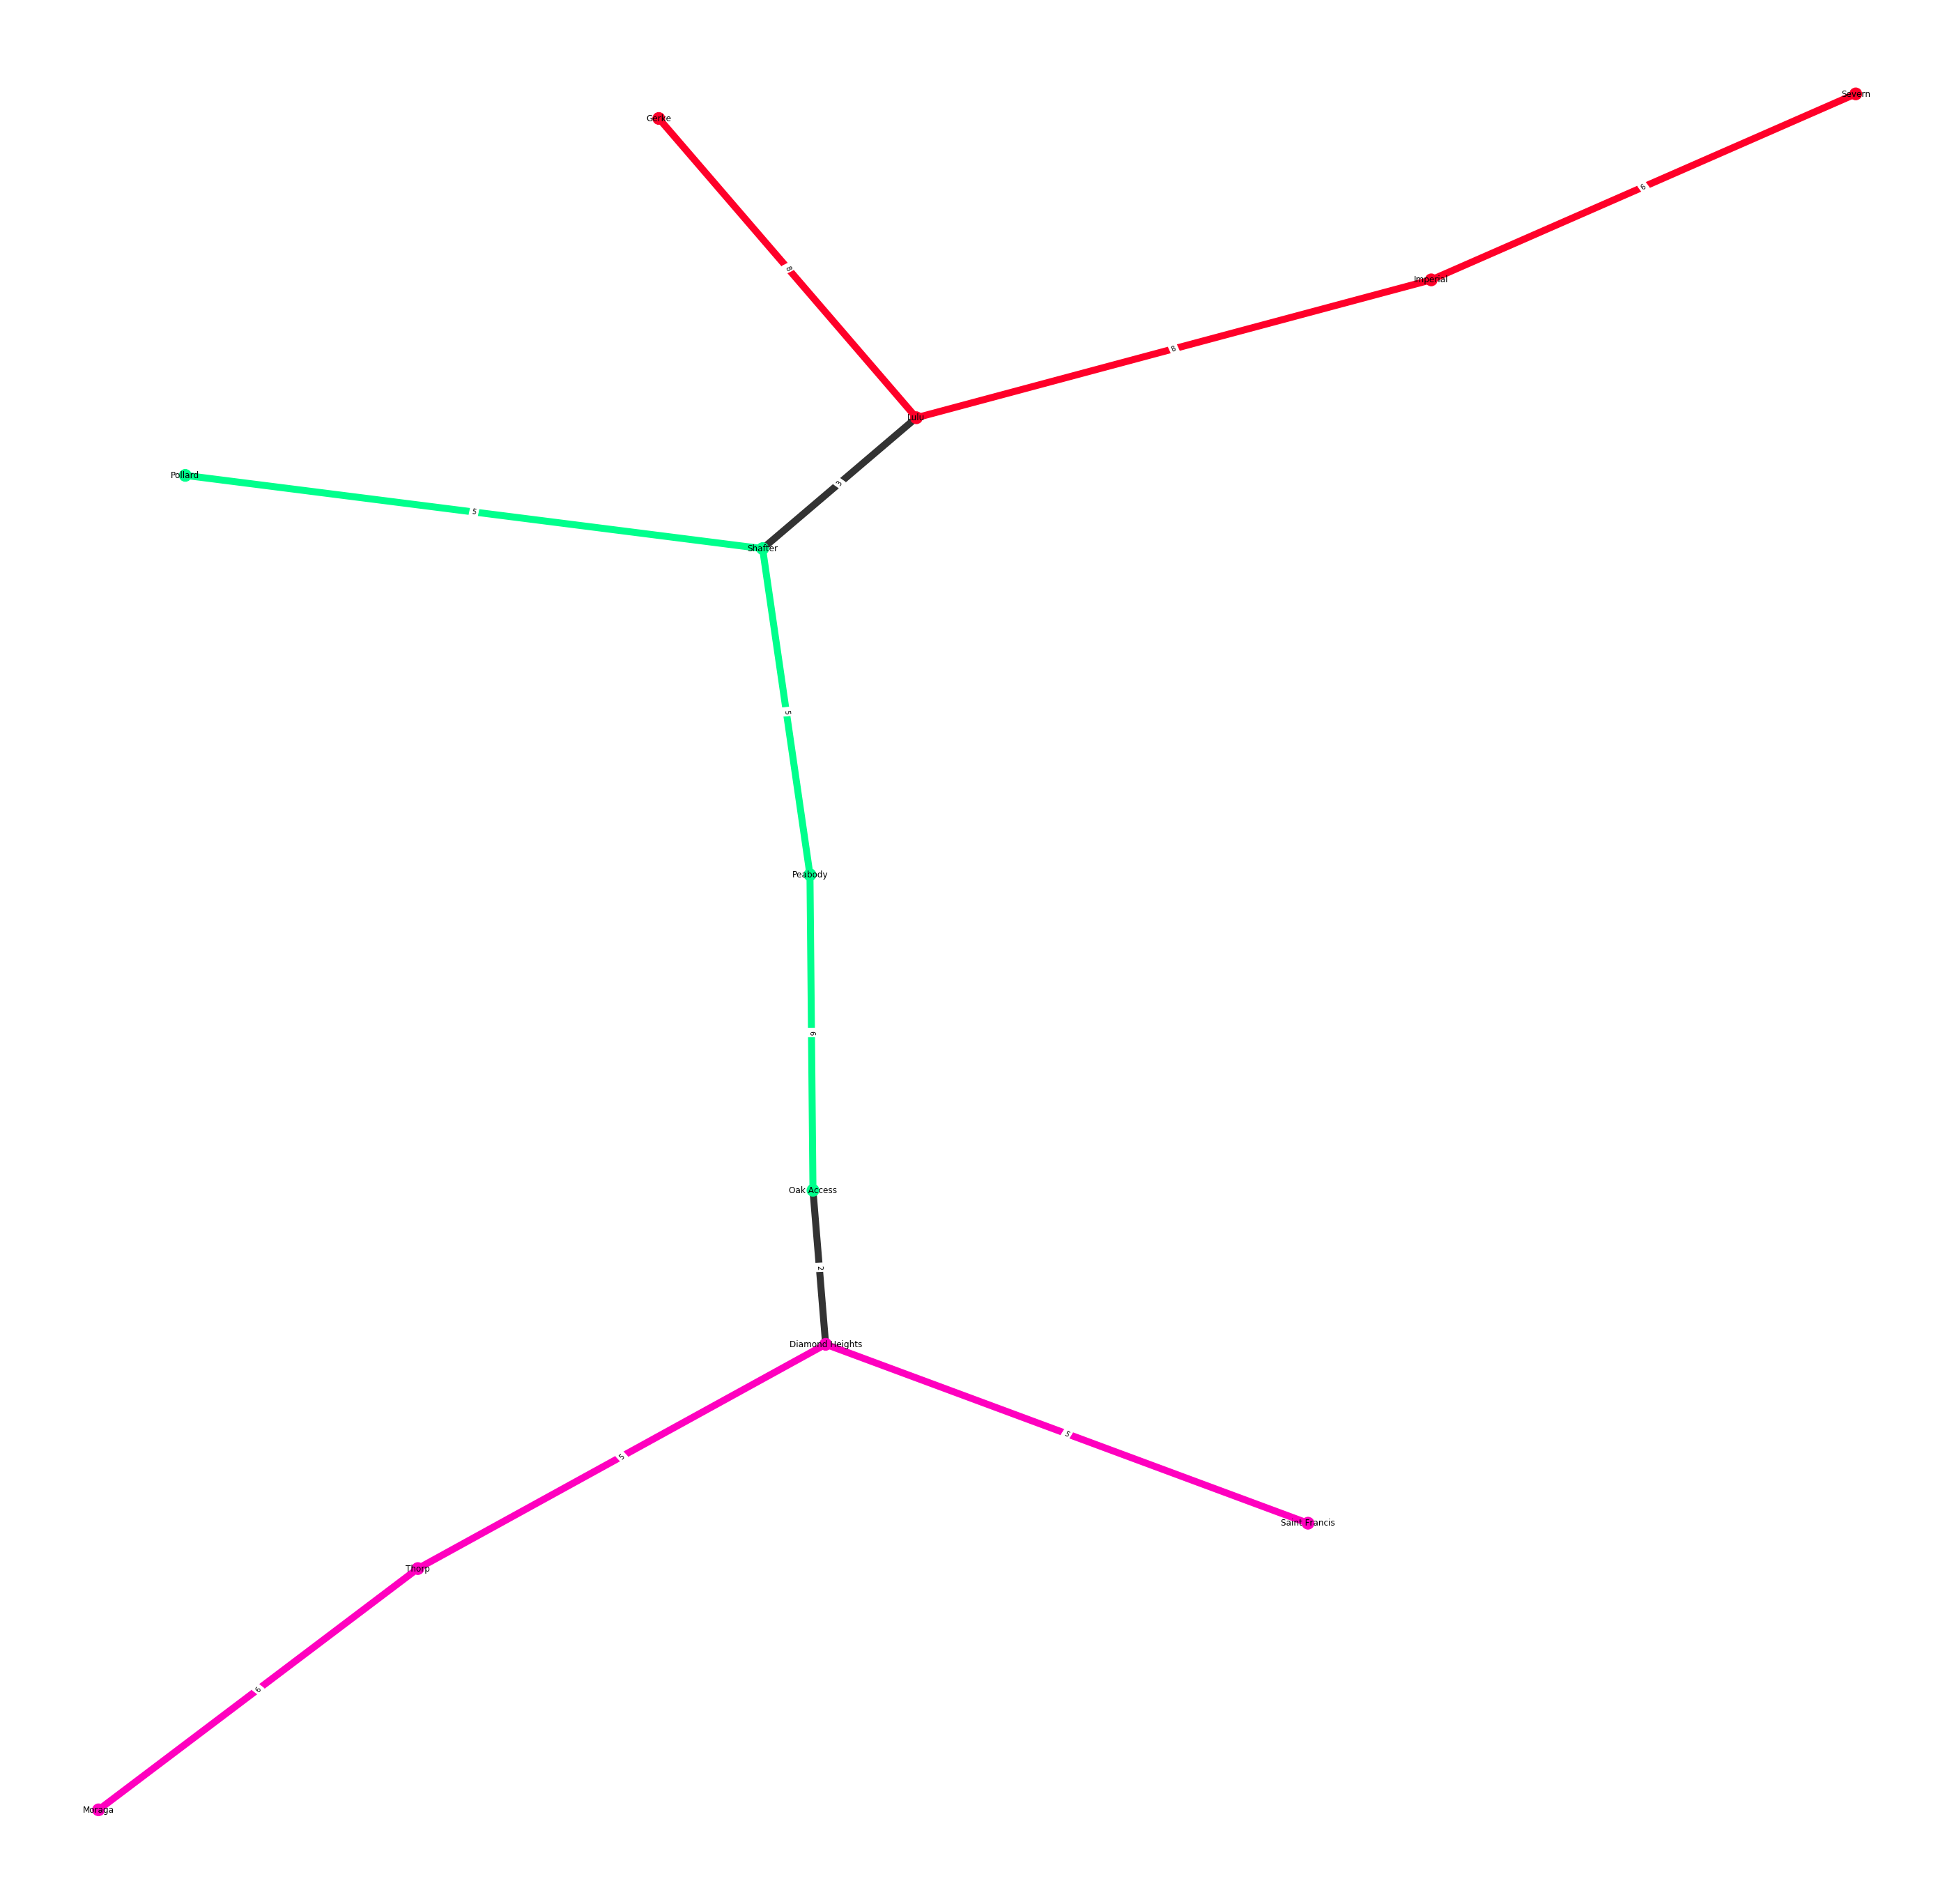

In [54]:
a = get_svg([4]*3)
a